# **Intro to Quantum Circuits**
***



This first lesson is designed to introduce you to Qiskit’s formalism for running quantum circuits, specifically creating quantum systems using QuantumCircuits. This lesson is recommended for first time users of Qiskit.

In [2]:
!pip install qiskit

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [3]:
from qiskit import QuantumRegister , ClassicalRegister, QuantumCircuit , Aer , execute
import numpy as np
import math as m
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

# **Creating Our First Quantum State**
***

## **Qiskit**
Qiskit has four main
components in its quantum computing stack, as listed here:
1. Qiskit Terra: This provides all the essential components for
building quantum circuits.
2. Qiskit Aer: You can develop noise models for simulating realistic noisy simulations that can occur in real quantum computing devices using Aer tools. Aer also provides a C++
simulator framework.
3. Qiskit Ignis: This is a framework for analyzing and minimizing
noise in quantum circuits.
4. Qiskit Aqua: This contains cross-domain algorithms and logic to
run these algorithms on a quantum real device or simulator.

Qiskit allows us to create algorithms for a quantum computer. These algorithms tell the quantum
computer what kinds of quantum systems to create, and then manipulate them with gates. Compared to classical algorithms, we
will find that programming for a quantum computer is quite different, requiring us to face many new limitations posed on us by
quantum systems. In turn however, these quantum algorithms allow us to solve problems much faster than any classical approach.

Let’s start with the simplest quantum system there is:


  $|{\psi}>$ =  $|0>$
  

This is a quantum system of 1 qubit, in the state |0>. Not terribly exciting, but we have to start somewhere! Consider this the
”Hello World!” to programing with qubits.

Let’s see the code that generates this system, and then dissect its components:

In [4]:
from qiskit import QuantumRegister , ClassicalRegister , QuantumCircuit , Aer , execute

qreg_q = QuantumRegister(1,'q')
creg_c = ClassicalRegister(1,'c')

hello_qubit = QuantumCircuit(qreg_q , creg_c)

hello_qubit.id(qreg_q[0])

job =   execute(hello_qubit, S_simulator)
result =  job.result()
result.get_statevector()


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Congrats, you’ve just created your first quantum system using Qiskit!

Okay, it’s not a very exciting result, but there are already a lot of things going on in this code. Starting with our imports:

***
from qiskit import **QuantumRegister, QuantumCircuit, Aer, execute**
***

These imports are what allow us to create and see the quantum system we are working with.

**QuantumRegister** – this is a class that holds our qubits. When we go to perform gate operations on our system, we call on the
QuantumRegister’s index locations, corresponding to the qubits we are interested in.  
**QuantumCircuit** – this is a class that can be thought of as our ”instructions” for the quantum system. As we want to design
larger and more complex algorithms, we will store operations into QuantumCircuits, which we can then call upon by
simulators to run them later.    
**Aer** – this is a class that handles using classical simulator backends. Since we will be doing all of our tutorials via classical
simulations, we will be using this class regularly. The actual name for this class is AerProvider, but qiskit just lets us import
and use it as Aer.   
**execute** – this is a function that we must import in order to run our quantum algorithms. By itself, a QuantumCircuit is like a
list that hold all our our quantum operations. Therefore, execute is what will allow us to run these instructions.   
**S_simulator** - this is a variable that we have created for storing our classical simulator. We use the
Aer class and call upon a specific backend: **’statevector_simulator’**. This backend is what will allow us to view the wavefunction
of our quantum system, and is one of two backends that we will use frequently throughout these tutorials. This simulator returns the quantum state, which is a complex vector of dimensions $2^n$ , where n is the number of qubits 


The goal of this lesson is to become familiar with some of the basics of building and running QuantumCircuits, so don’t worry
if all of these new terms don’t make sense just yet.

Now, let’s start with our first three lines of code:

***
qreg_q = QuantumRegister(1,'q')   
creg_c = ClassicalRegister(1,'c')  
hello_qubit = QuantumCircuit(qreg_q , creg_c)  
hello_qubit.id(qc[0])
***

- The first line of code is creating a QuantumRegister of 1 qubit, and calling it ’qreg_q’. 
- In the next line we create a ClassicalRegister of 1 bit and call it 'creg_c'. 
- We then create a QuantumCircuit called ’hello_qubit’, using the quantum register and classical register we just created. 
- And lastly, we apply the Identity operator to our single qubit,using the function **id**, and specifying that we want this Identity operation to be applied to qreg_q[0]  

The indexing on the QuantumRegister works the same way as Python ordering, where the first entry is always 0.

These three lines of code are a good template for the basic flow of creating a quantum algorithm in Qiskit: 
1. Define how many
qubits you want 
2. Store them in a QuantumRegister
3. Create a QuantumCircuit using all (or just some) of the qubits in your
quantum register 
4. Apply gate operations, measurements, etc.

By default, when we create a QuantumCircuit of N qubits, all of the qubits start off in the state $|0>$. But, they aren’t technically
in our system until we apply at least one gate operation to them. Thus, in the example above, in order to create our state
$|{\psi>}$ = $|0>$, we must apply the Identity gate.

Now onto the remaining lines of code:

***
job = execute(hello_qubit, S_simulator)  
result = job.result()  
result.get statevector()
***

In Qiskit, we create QuantumCircuits, but by themselves they do not represent any physical quantum system. They are just a
set of instructions, so we must tell Qiskit what we want to do with them, or more specifically, on what we want to run them.
Our choices for how we can run our quantum circuits come in the form of ’backends’. In our example, we want to run our
QuantumCircuit on a classical simulator which is Ideal (without any noise) quantum circuit simulator so that we can see its wavefunction.

Let’s now focus solely on the backend that we will be working with: **statevector simulator**. The following cell of code
showcases several features of this backend object:

In [5]:
S_simulator = Aer.backends(name='statevector_simulator')[0]

print('simulator: ' , S_simulator, '\n')
print('simulator type: ' , type(S_simulator) , '\n')
print('Aer.backend(name = statevector_simulator): ' , Aer.backends(name = 'statevector_simulator'))

simulator:  statevector_simulator 

simulator type:  <class 'qiskit.providers.aer.backends.statevector_simulator.StatevectorSimulator'> 

Aer.backend(name = statevector_simulator):  [StatevectorSimulator('statevector_simulator')]


To summarize what is going on here, the single line of code at the top is assigning the class **StatevectorSimulator** to our variable
’S_simulator’. We do this with the function **backends**, which is part of Aer. This StatevectorSimulator class is what is going
to allow us to see our wavefunction at the end of our code, simulating the quantum state classically via statevector_simulator.
We get this class via the line:

***
Aer.backends(name='statevector_simulator')[0]
***

which returns a class object, as shown above. In essence, all we really need to know is that this first line of code is correctly
grabbing the backend we want, and storing it in a variable which we can call upon at any time.

Our last three lines of code then do the rest of the work, converting our QuantumCircuit into a printable wavefunction for us
to view. Understanding the full details of this process isn’t really necessary for our educational purposes here, but if you are
interested, we encourage you to look at the source code. Essentially, the instructions of our QuantumCircuit go through two
more classes before finally coming out as a printable wavefunction:

**execute( QuantumCircuit, backend ) → job → result → display the results**

where the job and results step in our code are the classes:

In [6]:
S_simulator = Aer.backends(name='statevector_simulator')[0]

job =   execute(hello_qubit, S_simulator)
print(' job = AerJob class: ' , type(job))

result =  job.result()
print('result = Result class: ' , type(result))

 job = AerJob class:  <class 'qiskit.providers.aer.jobs.aerjob.AerJob'>
result = Result class:  <class 'qiskit.result.result.Result'>


And **get_statevector** is a function defined in the **Result** class, which prints our wavefunction as an array:

In [7]:
result.get_statevector()

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


If everything just now didn’t sink in, don’t worry. We’ve just gotten through all the technically stuff first, for those who might
be so inclined as to rummage through Qiskit’s code for themselves. If you’re not so interested in how Qiskit works, and want to
learn how to get Qiskit to work, don’t worry, there’s plenty of that left in this tutorial!

## **Let’s Bump Up the Qubits**
***

Returning now to creating quantum systems, so far we’ve seen how to create a 1-qubit system (pretty exciting !!!). Since
we just spent quite a bit of time looking at all of the components in detail, let’s see it once again in its entirety:

In [8]:
from qiskit import QuantumRegister , ClassicalRegister , QuantumCircuit , Aer , execute

qreg_q = QuantumRegister(1,'q')
creg_c = ClassicalRegister(1,'c')

hello_qubit = QuantumCircuit(qreg_q , creg_c)

hello_qubit.id(qreg_q[0])

job =   execute(hello_qubit, S_simulator)
result =  job.result()
result.get_statevector()

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In this first example, we created a system of a single qubit in the state $|0>$. This was done by simply creating a QuantumRegister
object of 1 qubit, and using it to create a QuantumCircuit using the Identity operator.

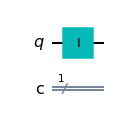

In [9]:
hello_qubit.draw('mpl')

Let’s create another simple state, $|ψ>$ = $|000>$ , which contains three qubits all in the $|0>$ state:

In [10]:
qreg_q = QuantumRegister(3,'q')
creg_c = ClassicalRegister(3,'c')

three_qubits = QuantumCircuit(qreg_q , creg_c)

three_qubits.id(qreg_q[0])
three_qubits.id(qreg_q[1])
three_qubits.id(qreg_q[2])

job = execute(three_qubits , S_simulator)

result = job.result()

result.get_statevector()s

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


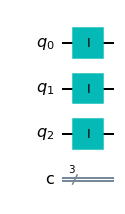

In [11]:
three_qubits.draw('mpl')

$|000>$

Now, in this example we create a QuantumCircuit of three qubits. Then, since we want each qubit to be in the $|0>$
state, we apply the Identity gate to each one. Using this QuantumCircuit, we create a **job** via execute, create a **result** from
that job, and then display the results via our get_statevector function. The result is our wavefunction, printed as a length-8 array.

Note: statevector_simulator returns the quantum state, which is a complex vector of dimensions $2^n$ , where n is the number of qubits 

Although there are no labels telling us which states are which in our wavefunction array, we can deduce that the first entry must
be the state $|000>$, since it has an amplitude of 1. However, it’s not immediately clear as to which entries represent the remaining
states. For clarity, the order in which the states are represented above are as follows:

[ $|000>$ , $|001>$ , $|010>$ , $|011>$ , $|100>$ , $|101>$ , $|110>$ , $|111>$ ]

where the order of this qubits is from right to left. Thus, the state $|001>$, where qubit 0 is in the $|1>$ state, can be created as follows:

In [12]:
qreg_q = QuantumRegister(3,'q')
creg_c = ClassicalRegister(3,'c')

three_qubits = QuantumCircuit(qreg_q , creg_c)

three_qubits.x(qreg_q[0])

three_qubits.id(qreg_q[1])
three_qubits.id(qreg_q[2])

job = execute(three_qubits , S_simulator)

result = job.result()

result.get_statevector()

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


### $|001>$ state

Note, the X gate used here flips a qubit’s state between 0 and 1 (which we will cover later). The array above
confirms that the state $|001>$ is indeed located at the index location 1.

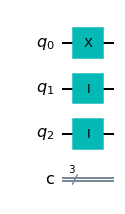

In [13]:
three_qubits.draw('mpl')

In [22]:
result.get_statevector()

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


### $|010>$ state

In [23]:
qreg_q = QuantumRegister(3,'q')
creg_c = ClassicalRegister(3,'c')

three_qubits = QuantumCircuit(qreg_q , creg_c)

three_qubits.id(qreg_q[0])

three_qubits.x(qreg_q[1])
three_qubits.id(qreg_q[2])

job = execute(three_qubits , S_simulator)

result = job.result()

result.get_statevector()

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


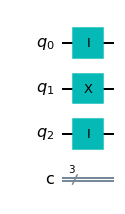

In [24]:
three_qubits.draw('mpl')

### Practice
- Try imlpementing all the basis states of a 4 qubit system.